### Multiresolution regression of a function with non-continuous derivative

**Author**: Daniele E. Schiavazzi

**Date**: June 28th, 2017

**Objectives of this tutorial**:
- Introduce **multiwavelet basis** for stochastic regression.
- Show **how to play with the parameters** needed to generate these functions.
- **Demonstrate application in regression** for a simple 1D function with discontinuous derivative.

In [1]:
# Imports
import sys,math
sys.path.insert(0, '../')
import numpy as np
import matplotlib.pyplot as plt
from common import *

Let's first define a simple function
$$
f(x) = \frac{1.0}{\vert 0.25 - x^2\vert + 0.1}
$$
defined in the $[0,1]$ interval, with discontinuous slope at 0.5. Let's plot it to see what it looks like.


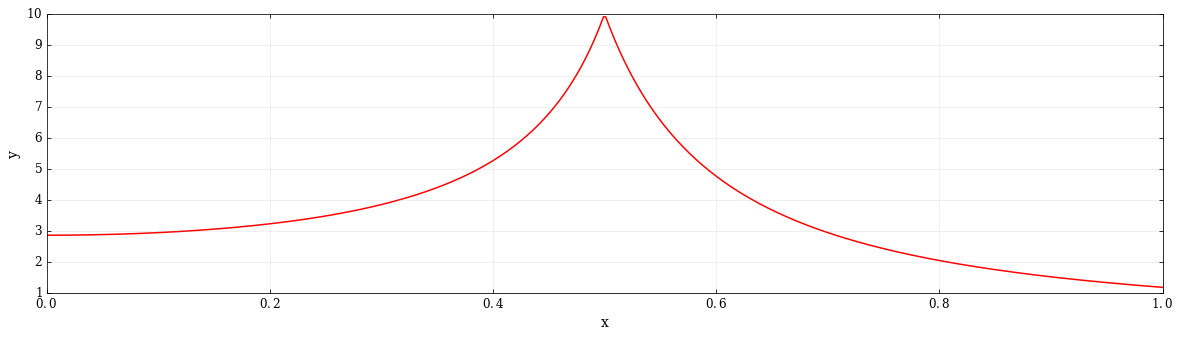

In [2]:
# Model Function
def runModel(xVals):
  return 1.0/(np.fabs(0.25 - np.square(xVals))+0.1)

# Plot a stochastic response with steep gradients
xExact = np.arange(500)/499.0
yExact = runModel(xExact)

# Plot Function
plt.figure(figsize=(20,5))
plt.subplot(1,1,1)
plt.plot(xExact,yExact,'r-')
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.show()

Define a flag to switch between random and equally spaced sampling points.

In [3]:
# Flag for random points
useRandomLocs = True
numberOfSampels = 30

# Random Polynomial OLS Regression 
np.random.seed(0)
if(useRandomLocs):
  xVals = np.sort(np.random.rand(numberOfSampels))
else:
  xVals = np.arange(numberOfSampels)/float(numberOfSampels-1)
yVals = runModel(xVals)

Let's visualize the selected sampling points

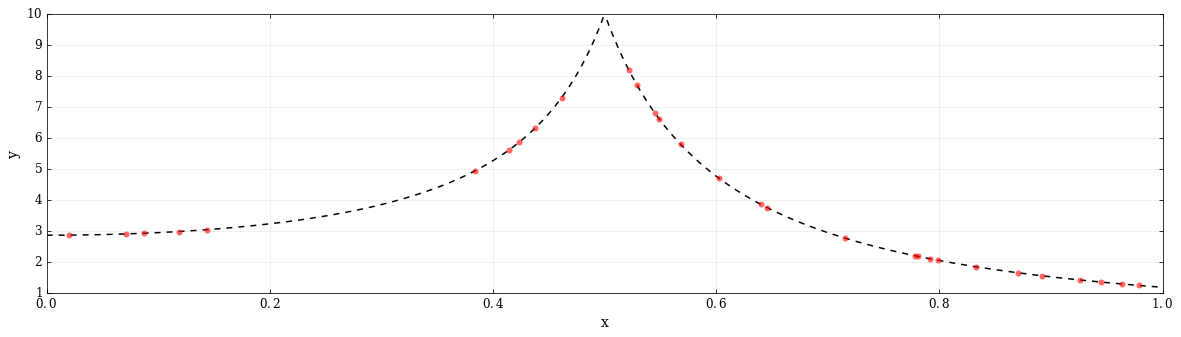

In [4]:
# Plot Function
plt.figure(figsize=(20,5))
plt.subplot(1,1,1)
plt.plot(xExact,yExact,'k--')
plt.plot(xVals,yVals,'ro',markersize=6,alpha=0.6)
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.show()

Since we would like to perform regression with Legendre polynomials first, **we need to scale** xVals to fit in the $[0,1]$ interval.

In [5]:
# Normalize Inputs
xTrain = np.resize(2.0*xVals - 1.0,(len(xVals),1))

We want to perform regression using [Relevance Vector Machine](http://www.jmlr.org/papers/volume1/tipping01a/tipping01a.pdf) regression. So we once again initialize the associated python class as done in the previous tutorial.

In [6]:
# Init RVM Object
rvm = tulipRVM()

0.0


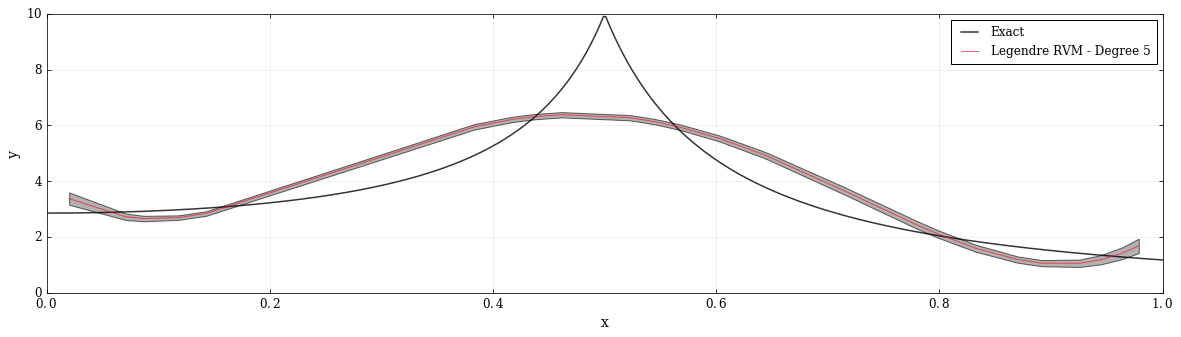

In [23]:
# Make Polynomial Regressions with RVM using polynomials of order 5
measMat = buildRegressionMatrix(xTrain,5)
rvmCoeffs,rvmCoeffsCov,rvmNoise = rvm.train(measMat,yVals)

# Compute the average reconstructed Qtys
rvmY = np.dot(np.array(measMat.getMatrix()),rvmCoeffs)
# Compute the uncertainty region
rvmAux = np.dot(np.dot(np.array(measMat.getMatrix()),rvmCoeffsCov),np.array(measMat.getMatrix()).transpose())
shrink_idx = rvmAux < 0.0
rvmAux[shrink_idx] = 0.0
rvmSTDQ = np.diag(rvmNoise + np.sqrt(rvmAux))

plt.figure(figsize=(20,5))
plt.subplot(1,1,1)
plt.plot(xExact,yExact,'k-',alpha=0.8,label='Exact')
plt.plot(xVals,rvmY,'r-',alpha=0.6,lw=1.0,label='Legendre RVM - Degree 5')
plt.fill_between(xVals,rvmY+rvmSTDQ, rvmY-rvmSTDQ,facecolor='gray',interpolate=True,alpha=0.6)
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.legend(fontsize=12)
plt.show()

Let's increase the order of the polynomials regression to 40.

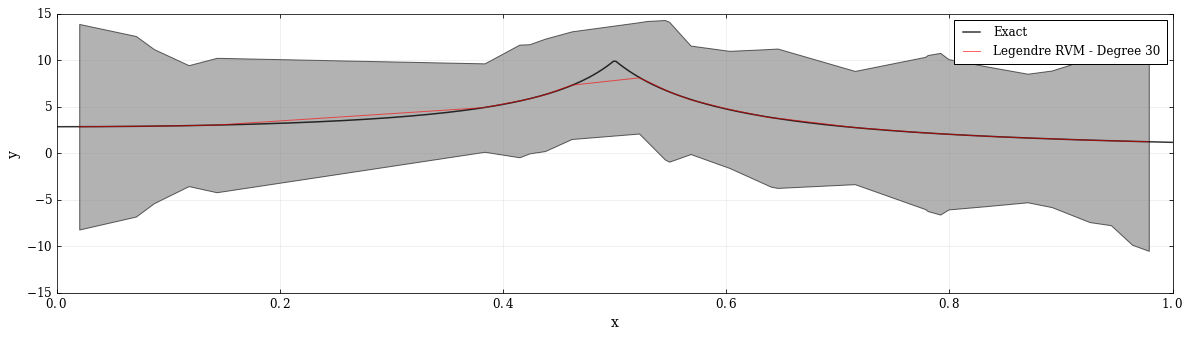

In [21]:
# Make Polynomial Regressions with RVM using polynomials of order 30
measMat = buildRegressionMatrix(xTrain,40)
rvmCoeffs,rvmCoeffsCov,rvmNoise = rvm.train(measMat,yVals)

# Compute the average reconstructed Qtys
rvmY = np.dot(np.array(measMat.getMatrix()),rvmCoeffs)
# Compute the uncertainty region
rvmAux = np.dot(np.dot(np.array(measMat.getMatrix()),rvmCoeffsCov),np.array(measMat.getMatrix()).transpose())
shrink_idx = rvmAux < 0.0
rvmAux[shrink_idx] = 0.0
rvmSTDQ = np.diag(rvmNoise + np.sqrt(rvmAux))

plt.figure(figsize=(20,5))
plt.subplot(1,1,1)
plt.plot(xExact,yExact,'k-',alpha=0.8,label='Exact')
plt.plot(xVals,rvmY,'r-',alpha=0.6,lw=1.0,label='Legendre RVM - Degree 30')
plt.fill_between(xVals,rvmY+rvmSTDQ, rvmY-rvmSTDQ,facecolor='gray',interpolate=True,alpha=0.6)
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.legend(fontsize=12)
plt.show()

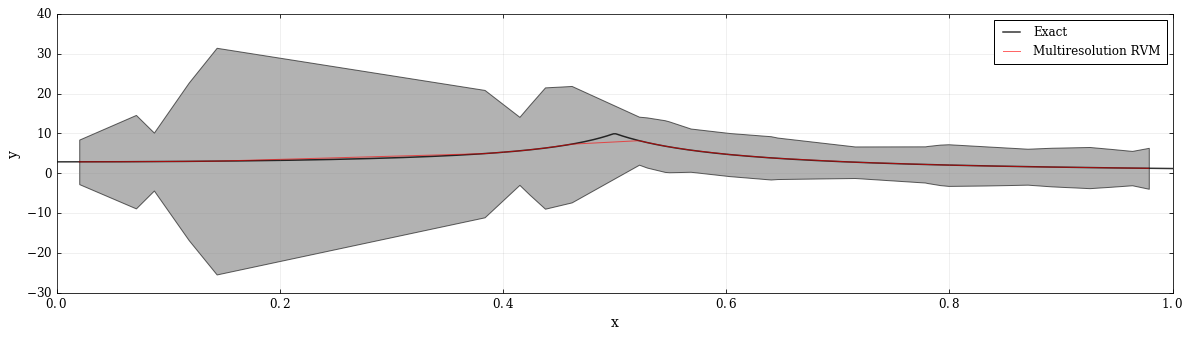

In [22]:
# Make Polynomial Regressions with RVM
maxOrder = 3
maxDetailLevel = 2
measMat = buildMultiresolutionMatrix(np.resize(xVals,(len(xVals),1)),maxOrder,maxDetailLevel)
rvmCoeffs,rvmCoeffsCov,rvmNoise = rvm.train(measMat,yVals)

# Compute the average reconstructed Qtys
rvmY = np.dot(np.array(measMat.getMatrix()),rvmCoeffs)
# Compute the uncertainty region
rvmAux = np.dot(np.dot(np.array(measMat.getMatrix()),rvmCoeffsCov),np.array(measMat.getMatrix()).transpose())
shrink_idx = rvmAux < 0.0
rvmAux[shrink_idx] = 0.0
rvmSTDQ = np.diag(rvmNoise + np.sqrt(rvmAux))

plt.figure(figsize=(20,5))
plt.subplot(1,1,1)
plt.plot(xExact,yExact,'k-',alpha=0.8,label='Exact')
plt.plot(xVals,rvmY,'r-',alpha=0.6,lw=1.0,label='Multiresolution RVM')
plt.fill_between(xVals,rvmY+rvmSTDQ, rvmY-rvmSTDQ,facecolor='gray',interpolate=True,alpha=0.6)
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.legend(fontsize=12)
plt.show()


You can play with the maxOrder and maxDetailLevel parameters to see how they affect the generated approximant.